# ADM-HW5

In this last homework our job is to create a network of all pages in order to do the questions proposed by the professors. So, we starting to import few libraries useful to execute this jupyter notebook, a huge importance is considering the file functions that contains all functions made for this homework.

In [1]:
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
import networkx as nx

import functions as fun

# Load the datasets

In this section we import the datasets in order to do the questions reported below this part. 

So, we load the file  "wikigraph_reduced.csv" where we create the main network with all links between pages. This file contains the pages whose belong to the categories that contain a number of articles between 5000 and 30000. 

Then, we uploaded also the "wiki-topcats-page-names.txt" in order to save the name of all pages and "wiki-topcats-categories.txt" where we should control if the main rule is respected. 

Despite, the professors said that the categories contained the right number of pages for each category, we try to prove this step and we saw that the dataset didn't contain the right number of pages per category, so we fixed the categories with the right range.

In [2]:
edges = fun.read_edges()
edges.head()

,source,dest
0,95,1185516
1,108,1059989
2,108,1062426
3,108,1161925
4,134,541222


After the first load, read the "wiki-topcats-page-names.txt".

In [3]:
pages_names = fun.read_pages_name()
pages_names

,name
node,
0,Chiasmal syndrome
1,Kleroterion
2,Pinakion
3,LyndonHochschildSerre spectral sequence
4,Zariski's main theorem
...,...
1791484,Noadiah Russell (Yale founder)
1791485,Cornus officinalis
1791486,Peter Grummitt


Read each line of the "wiki-topcats-categories.txt" and check the right number of pages, if this number stays outside the range of 5000 and 30000 kick out that category.

In [4]:
categories = fun.read_categories()
categories

,Category,Pages List
0,English_footballers,"[22860, 28411, 28961, 28979, 29264, 29573, 295..."
1,The_Football_League_players,"[14003, 23536, 27109, 27348, 27459, 27989, 280..."
2,Association_football_forwards,"[26876, 26877, 26879, 26887, 26892, 26904, 269..."
3,Association_football_midfielders,"[14003, 15291, 23536, 26880, 26882, 26885, 268..."
4,Association_football_defenders,"[15217, 22860, 26873, 26878, 26881, 26898, 269..."
5,Harvard_University_alumni,"[77, 1013, 1271, 1663, 1779, 1843, 2212, 3193,..."
6,Major_League_Baseball_pitchers,"[79, 24213, 33054, 37167, 53973, 63107, 69823,..."
7,Members_of_the_United_Kingdom_Parliament_for_E...,"[29098, 29493, 29585, 30255, 30389, 30505, 306..."
8,Indian_films,"[1308, 29286, 53565, 70274, 70275, 70797, 1233..."
9,Year_of_death_missing,"[98, 126, 227, 1823, 2170, 2223, 13215, 14003,..."


You will notice that one article might belong to a single category or multiple ones. In the case of multiple appearance, you break the ties uniformly at random.

create a vocabulary in order to create the clean categories without replicates.

In [5]:
nodes = fun.create_vocabulary(categories)

Choose uniformly at random a category where the page will be belong, then create the dictionary.  

Remove also the categories that haven't any node in the graph. Then, we will visualize the correct dataset represented the categories which haven't any node common in other categories

In [6]:
new_categories = fun.fix_categories(categories, edges, nodes)
new_categories

,category,pages list
0,English_footballers,"[28961, 48718, 48730, 72482, 72496, 72532, 725..."
1,Association_football_forwards,"[33973, 72696, 73060, 75271, 75366, 75474, 755..."
2,The_Football_League_players,"[48583, 72536, 72545, 72555, 72563, 72569, 725..."
3,Association_football_midfielders,"[72488, 72539, 72580, 73109, 73145, 74507, 751..."
4,Year_of_death_missing,"[72528, 72591, 72620, 72829, 73047, 73148, 752..."
5,Association_football_defenders,"[72798, 72943, 73163, 73293, 74652, 75200, 752..."
6,Year_of_birth_missing,"[74377, 76428, 93457, 93575, 96409, 672780, 11..."
7,Place_of_birth_missing_(living_people),"[79909, 84217, 84470, 93493, 75195, 83446, 867..."
8,Harvard_University_alumni,"[1663, 1843, 3260, 3431, 11386, 11858, 12295, ..."
9,American_television_actors,"[154133, 400707, 602072, 725585, 744023, 74413..."


# RQ1

Build the graph G=(V, E), where V is the set of articles and E the hyperlinks among them. Now, according to the professors requests we created the graph, but first we consider if the edges dataframe contents a graph directed or not.. in order to understand if the graph is directed or not.

In [7]:
G = fun.check_creation_graph(edges)

After the execution of the function, create the graph adding the nodes and edges presents in the edges dataset loaded before this question.

In [8]:
G = fun.create_graph(edges, pages_names, G)

These are the main info about this new graph created before.

Now, we are focussing to show the proper features of the graph, in terms of how many articles are present, how many edges are present and so on.

In [9]:
nx.info(G)

'Name: \nType: DiGraph\nNumber of nodes: 98343\nNumber of edges: 483094\nAverage in degree:   4.9123\nAverage out degree:   4.9123'

We have exactly 98343 nodes present in this graph and 483094 edges between them, how can we see below this cell.

In [10]:
print(f"The number of nodes is: {G.number_of_nodes()} and the number of edges is: {G.number_of_edges()}")

The number of nodes is: 98343 and the number of edges is: 483094


We know that our graph is directed to understand if the graph is sparse or not, we should use this formula:

$D = \frac{|E|}{|V|(|V|-1)}$

a dense graph is a graph in which the number of edges is close to the maximal number of edges.

In [11]:
# we can use also nx.density(G)
D = (G.number_of_edges())/(G.number_of_nodes()*(G.number_of_nodes()-1))
print(f"The graph density is: {D}, so the graph is sparse")

The graph density is: 4.9951571365597335e-05, so the graph is sparse


the average of link per article is.. (considering the **degree** of each node)

In [12]:
degrees = dict(G.degree())
sum(degrees.values())/float(len(G))

9.824674862471147

the result presents above include in_degree and out_degree of a graph. We can consider also the in_degree and out_degree formula. But, you could use also the native function of networkx

In [13]:
indegree = sum(dict(G.in_degree()).values())/float(len(G))
outdegree = sum(dict(G.out_degree()).values())/float(len(G))
print(f"the indegree = {indegree} and the outdegree = {outdegree}")

the indegree = 4.912337431235573 and the outdegree = 4.912337431235573


How can we saw briefly above this cell, with these few formulas we can know the degree distribution (added also the out-degree and in-degree for a good way to see the values obtained from our graph) and if this graph is dense or sparse, amazing no?

Now, we are focussing on the visualization of this degree distribution, so..

We are displaying the **nodes degree distribution** considering the in-degree and out-degree.

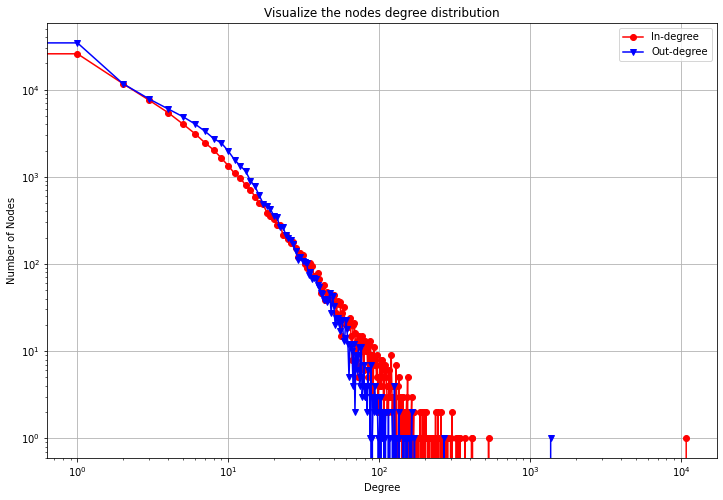

In [14]:
in_degree_freq = fun.degree_histogram_directed(G, in_degree=True)
out_degree_freq = fun.degree_histogram_directed(G, out_degree=True)

fun.plot_degree_distro(in_degree_freq, out_degree_freq)

# RQ2

For this section the first part consisting to insert from input the page that we want to explore in d click choose by a user, then we apply the corresponding algorithm to solve this exercise. 

For this section is useful to execute the **breadth-first search (BFS)**, because we are interested to search all pages that I can achieve at a determinate level (number of click), so this is the most algorithm useful to achieve our goal and that solve the question of our professors.

choose in input a page v, that is considering as the source node in order to start well the algorithm.

In [15]:
v = int(input("Choose a node to start the BFS: "))

Choose a node to start the BFS: 1663


choose the number of clicks d where I can achieve in a good way n pages at level d.

In [16]:
d = int(input("Choose a number of clicks: "))

Choose a number of clicks: 3


Start the algorithm and check if with d click how pages you can arrive starting to the source node considering before this execution. If you can't arrive with d clicks into any pages.. you will receive an advise equal to "Not Possible!".

In [19]:
dist, nodes = fun.BFS(G, v, d)

Check if with d clicks you can arrive to determinate pages destinations and print it, if you can't arrive into any pages print "Not Possible!"

In [20]:
if dist == float("inf"):
    print("Not Possible!")
else:
    indices = [i for i, x in enumerate(dist) if x == d]
    nodes = [pages_names.loc[str(x), "name"] for i, x in enumerate(nodes) if i in indices]
    print(f"the set of all pages that you can achieve with {d} are {nodes}")

the set of all pages that you can achieve with 3 are ['Born Innocent (Redd Kross album)', 'Beyond the Valley of the Dolls', 'Linda Blair']


# RQ3
returns the minimum number of clicks required to reach all pages in p, starting from the page v, corresponding to the most central article, according to the in-degree centrality, in C.

In [29]:
ctg = list(new_categories["category"])
pg_lst = list(new_categories["pages list"])

union_lst = [ [x, list(map(int,pg_lst[i]))] for i, x in enumerate(ctg) ]

my_dict = {x[0]: x[1] for x in union_lst}

Choose randomly the category in order to find the minimum number of clicks to achieve all nodes in one category.

In [30]:
cat = random.sample(my_dict.keys(), 1)[0]
cat

'The_Football_League_players'

Consider the subgraph of G interesting to the selected category chose.

In [31]:
new_cat = G.subgraph(my_dict[cat])
print(f"the number of pages are {len(new_cat)} and the number of edges are {len(new_cat.edges)}")

the number of pages are 3600 and the number of edges are 5562


Considering the node most centered in the graph is.. with the in-degree centrality.

In [32]:
indegree_node = { node: new_cat.in_degree(node) for node in new_cat.nodes if new_cat.in_degree(node) != 0 } # is only to check the max value linked, i don't consider the node without edges setted with inf
indegree_node = dict(sorted(indegree_node.items(), key=lambda item: item[1], reverse=True))

In [33]:
min_val = max(indegree_node.items(), key=lambda x: x[1])
source = min_val[0]
print(f"the node {min_val[0]} is the most centered with {min_val[1]} edges")

the node 82092 is the most centered with 66 edges


Call and calculate the BFS for all nodes.

In [34]:
# call different_bfs() and create the matrix of distances from v to all edges, so..
dict_allbfs = { k: { x: float("inf")  for x in my_dict[cat] } for k in my_dict[cat] }

In [35]:
def different_bfs(G, v):
    queue = [] # create queue for BFS
    
    # start BFS
    queue.append(v)
    distances = {}
    distances[v] = 0
    
    while queue:
        s = queue.pop(0)
        
        for neigh in nx.neighbors(G, s):
            if neigh not in distances:
                distances[neigh] = distances[s] + 1
                queue.append(neigh)
                
    return distances

In [36]:
for node in tqdm(dict_allbfs):
    distances = different_bfs(new_cat, node)
    for val in distances:
        dict_allbfs[node][val] = distances[val]

100%|██████████| 3600/3600 [00:22<00:00, 161.97it/s]


Now we create the new graph directed and well weighted.

In [37]:
G_cat_W = nx.DiGraph(directed=True)

for node in dict_allbfs:
    G_cat_W.add_node(node, name = pages_names.loc[str(node), 'name'])
    for edge in dict_allbfs[node]:
        if (dict_allbfs[node][edge] != float("inf")) and (dict_allbfs[node][edge] != 0):
            G_cat_W.add_edge(node, edge, weight=dict_allbfs[node][edge])

In [38]:
def nearest_neigh(G, v):
    queue = []
    queue.append(v)
    
    explored = {}
    explored[v] = 0
    while queue:
        s = queue.pop(0)

        near_dists = []
        for neigh in nx.neighbors(G, s):
            near_dists.append([neigh, G[s][neigh]['weight']])
        
        if near_dists:
            near_neigh = sorted(near_dists, key = lambda x: x[1])[0][0]
            if near_neigh not in explored:
                explored[neigh] = G[s][neigh]['weight']
                queue.append(near_neigh)
    
    if len(explored) != len(G.nodes):
        return "we can't achieve all pages, so.. NOT POSSIBLE!"
    else:
        return f"we need a minimum of {sum(explored.values())} steps to achieve all pages"

In [39]:
nearest_neigh(G_cat_W, source)

"we can't achieve all pages, so.. NOT POSSIBLE!"

# RQ4

In [40]:
class Graph:  
  
    def __init__(self,graph):  
        self.graph = graph # residual graph  
        self.org_graph = [i[:] for i in graph]  
        self. ROW = len(graph)  
        self.COL = len(graph[0])  
  
  
    def BFS(self,s, t, parent): #Returns true if there is a path from source 's' to sink 't' in residual graph. Also fills parent[] to store the path 
        visited =[False]*(self.ROW)  
        queue=[]  
        queue.append(s)  
        visited[s] = True
        while queue:
            u = queue.pop(0) 
            for ind, val in enumerate(self.graph[u]):  
                if visited[ind] == False and val > 0 :  
                    queue.append(ind)  
                    visited[ind] = True
                    parent[ind] = u  
        return True if visited[t] else False
          
    # Function for Depth first search Traversal of the graph 
    def dfs(self, graph,s,visited): 
        visited[s]=True
        for i in range(len(graph)): 
            if graph[s][i]>0 and not visited[i]: 
                self.dfs(graph,i,visited) 
  
    # Returns the min-cut of the given graph  
    def minCut(self, source, sink):  
        parent = [-1]*(self.ROW)  
        max_flow = 0   
        while self.BFS(source, sink, parent) :  
            # Find minimum residual capacity of the edges along the  
            # path filled by BFS. Or we can say find the maximum flow  
            # through the path found.  
            path_flow = float("Inf")  
            s = sink  
            while(s != source):  
                path_flow = min (path_flow, self.graph[parent[s]][s])  
                s = parent[s] 
            max_flow += path_flow  
            v = sink  
            while(v != source):  
                u = parent[v]  
                self.graph[u][v] -= path_flow  
                self.graph[v][u] += path_flow  
                v = parent[v]  
        s=0  
        visited=len(self.graph)*[False] 
        self.dfs(self.graph,s,visited) 
        counter=0
        for i in range(self.ROW):  
            for j in range(self.COL):  
                if self.graph[i][j] == 0 and self.org_graph[i][j] > 0 and visited[i]:  
                    counter+=1
        return counter 
  

In [46]:
c1=str(input('Choose the first category: ')).strip()
c1_flag=False
while c1_flag==False:
    c1_nodes=list(new_categories[new_categories.category==c1]["pages list"])[0]
    c1_nodes=[int(node) for node in c1_nodes]
    c1_subgraph=G.subgraph(c1_nodes)
    if list(c1_subgraph.edges)==[]:
        print("The chosen category does not exist in the graph")
        input("Choose a new category: ").strip()
    else:
        c1_flag=True
c2=str(input('Choose the second category: ')).strip()
c2_flag=False
while c2_flag==False:
    c2_nodes=list(new_categories[new_categories.category==c2]["pages list"])[0]
    c2_nodes=[int(node) for node in c2_nodes]
    c2_subgraph=G.subgraph(c2_nodes)
    if list(c2_subgraph.edges)==[]:
        print("The chosen category does not exist in the graph")
        input("Choose a new category: ").strip()
    else:
        c2_flag=True

Choose the first category:  English_footballers
Choose the second category:  Association_football_forwards	


In [47]:
subgraph_nodes=list(set(c1_nodes) | set(c2_nodes))
u,v=random.sample(subgraph_nodes,2)
subg=G.subgraph(subgraph_nodes)
nx.info(subg)

'Name: \nType: DiGraph\nNumber of nodes: 6131\nNumber of edges: 10298\nAverage in degree:   1.6797\nAverage out degree:   1.6797'

In [48]:
subg_adj=nx.adjacency_matrix(subg)
subg_graph=Graph(list(subg_adj.toarray()))
u,v=random.sample(range(np.shape(nx.adjacency_matrix(subg))[0]),2)
subg_graph.minCut(u,v)

0

# RQ5

Write a function that, given an arbitrary category C0 as input, returns the list of remaning categories sorted by their distance from C0. In particular, the distance between two categories is defined as

distance(C0, Ci) = median(ShortestPath(C0, Ci))

where ShortestPath(C0, Ci) is the set of shortest paths from each pair of nodes in the two categories.

In [49]:
c0 = str(input("Insert the first category: "))
c0

Insert the first category:  Debut_albums


'Debut_albums'

In [50]:
import statistics
from tqdm import tqdm

ctg = list(new_categories["category"])
pg_lst = list(new_categories["pages list"])
union_lst = [ [x, list(map(int,pg_lst[i]))] for i, x in enumerate(ctg) ]
my_dict = {x[0]: x[1] for x in union_lst}

list_c0 = my_dict[c0]
my_distances_bfs = {}
for node in tqdm(list_c0):
    my_distances_bfs[node] = different_bfs(G, node)

medians = []
for i, ct in tqdm(enumerate(ctg)):
    values_lists = []
    if ct != c0: 
        list_c_i = my_dict[ct]
        for node_x in list_c0:
            for node_y in list_c_i: 
                if node_y in my_distances_bfs[node_x]:
                    values_lists.append(my_distances_bfs[node_x][node_y])
                else:
                    values_lists.append(float("inf"))
        medians.append(statistics.median(values_lists))

100%|██████████| 2553/2553 [12:39<00:00,  3.36it/s]
21it [04:06, 11.76s/it]


In [63]:
dists2 = medians.copy()

In [64]:
union_dist_idx = [ [i, int(x)] for i, x in enumerate(dists2) if x != float("inf") ]
union_dist_idx = sorted(union_dist_idx, key=lambda x: x[1])

In [65]:
distance_cat0 = pd.DataFrame()
distance_cat0["category"] = [ new_categories.loc[x[0], "category"] for x in union_dist_idx ]
distance_cat0["distance"] = [ x[1] for x in union_dist_idx ]
distance_cat0

,category,distance
0,American_film_actors,6
1,American_television_actors,6
2,English-language_films,6
3,American_films,6
4,Black-and-white_films,7
5,Members_of_the_United_Kingdom_Parliament_for_E...,9
6,Rivers_of_Romania,11


# RQ6
Write a function that sorts the categories in the graph according to their PageRank (PR). For this task you need to model the network of categories such that you can apply the PR algorithm.

In [56]:
def PageRank(G, d = 0.85, max_iter = 100):
    probs_node = { x: 1 / len(G) for x in G.nodes }                                                                                             # create dict of uniform probs for each page
    out_degrees = { x: G.out_degree(x) if G.out_degree(x) != 0 else len(G) for x in G.nodes }                                                   # create dict of uniform out_degrees for each page and for a page with noone outlinks our choice is uniformly at all pages present, so consider the length of the graph 
    
    new_probs_node = probs_node.copy()                                                                                                          # save each new iteration considering always the old probabilities
                                                                                                                                                # the optimal way to choose the correct number of iterations
    for _ in tqdm(range(max_iter)):                                                                                                             # the algorithm iterate to achieve the best predictive socre  
        for p_x in new_probs_node:                                                                                                              # catch each page in order to update the probabilities                            
            ratios_sum = sum([ probs_node[neigh] / out_degrees[neigh] for neigh in nx.neighbors(G, p_x) ])                                      # increase the rank, check if the neighbors has outgoing links, if it not go forward to the next neighbor
            new_probs_node[p_x] = ( ( 1 - d ) / len(G) ) + ( d * ratios_sum )                                                                   # then update the value for the i-th node
        
            probs_node = new_probs_node.copy()
    
    return new_probs_node

In [57]:
# useful create a dict
refer_dt = categories[categories['Category'].isin(list(new_categories["category"]))]
lst_category = list(refer_dt['Category'])

lst_pages = [ set(map(int, lst_pg )) for lst_pg in list(refer_dt["Pages List"]) ]
my_dict = { cat: lst_pages[i] for i, cat in enumerate(lst_category) }

In [58]:
# create the new graph of categories and inserts the node as one category
new_G = nx.DiGraph(directed=True)
for cat in lst_category:
    new_G.add_node(cat)

In [59]:
# add edges
for x in tqdm(my_dict):
    for y in my_dict:
        if (x != y and len(my_dict[x].intersection(my_dict[y])) > 0):
            new_G.add_edge(x, y)

100%|██████████| 21/21 [00:00<00:00, 153.38it/s]


Is a reasonable situation because the categories don't have any nodes connect.

In [60]:
len(new_G.edges)

110

In [61]:
tot_PageRank = PageRank(new_G)
sum(tot_PageRank.values())

100%|██████████| 100/100 [00:00<00:00, 10008.36it/s]


0.9190476190476178

In [62]:
sum(nx.pagerank(new_G, alpha = 0.85).values())

0.9999999999999998